In [1]:
%matplotlib inline


# Robust linear model estimation using RANSAC

In this example we see how to robustly fit a linear model to faulty data using
the RANSAC algorithm.


In [27]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import linear_model, datasets


n_samples = 1000
n_outliers = 50


X1, y1, coef = datasets.make_regression(
    n_samples=n_samples,
    n_features=1,
    n_informative=1,
    noise=10,
    coef=True,
    random_state=50,
)


X2, y2, coef = datasets.make_regression(
    n_samples=n_samples,
    n_features=1,
    n_informative=1,
    noise=7,
    coef=True,
    random_state=401,
)

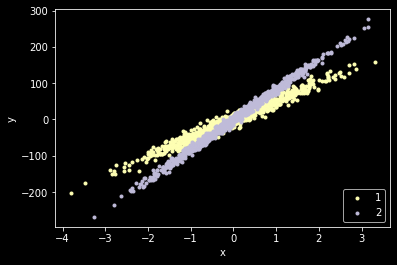

In [35]:
plt.style.use('dark_background')

lw = 2
plt.scatter(
    X1, y1, color="C1", marker=".", label="1"
)
plt.scatter(
    X2, y2, color="C2", marker=".", label="2"
)

plt.legend(loc="lower right")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [29]:
X = np.concatenate((X1, X2))
y = np.concatenate((y1, y2))

In [30]:
# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

In [33]:
ransac.get_params()

{'base_estimator': None,
 'is_data_valid': None,
 'is_model_valid': None,
 'loss': 'absolute_error',
 'max_skips': inf,
 'max_trials': 100,
 'min_samples': None,
 'random_state': None,
 'residual_threshold': None,
 'stop_n_inliers': inf,
 'stop_probability': 0.99,
 'stop_score': inf}

Estimated coefficients (true, linear regression, RANSAC):
82.65273878900804 [54.0015239] [62.22384138]


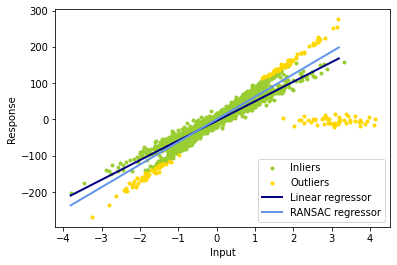

In [31]:
# Fit line using all data
lr = linear_model.LinearRegression()
lr.fit(X, y)

# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

# Compare estimated coefficients
print("Estimated coefficients (true, linear regression, RANSAC):")
print(coef, lr.coef_, ransac.estimator_.coef_)

lw = 2
plt.scatter(
    X[inlier_mask], y[inlier_mask], color="yellowgreen", marker=".", label="Inliers"
)
plt.scatter(
    X[outlier_mask], y[outlier_mask], color="gold", marker=".", label="Outliers"
)
plt.plot(line_X, line_y, color="navy", linewidth=lw, label="Linear regressor")
plt.plot(
    line_X,
    line_y_ransac,
    color="cornflowerblue",
    linewidth=lw,
    label="RANSAC regressor",
)
plt.legend(loc="lower right")
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()